# Feature Extraction
Compare the effects of:
- Nonnegative Matrix Factorization
- PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
from sklearn import datasets

In [2]:
boston_obj = datasets.load_boston()
boston_obj.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston_obj.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
y = boston_obj.target
y[0:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
boston = boston_obj.data
boston.shape

(506, 13)

In [6]:
boston

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Is the Boston data all non-negative?

In [7]:
(boston < 0).sum()

0

In [8]:
nmf = NMF(n_components=3, random_state=0)

In [9]:
boston_nmf = nmf.fit_transform(boston)

C:\Users\ilyas\Miniconda3\envs\data_science\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
C:\Users\ilyas\Miniconda3\envs\data_science\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [10]:
boston_nmf

array([[2.73971033, 3.44109087, 1.28212774],
       [2.21461446, 3.41035564, 1.66219827],
       [2.21489689, 3.4037101 , 1.23410961],
       ...,
       [2.5187064 , 3.39286761, 1.92434442],
       [2.5201336 , 3.3647883 , 1.88748026],
       [2.51855494, 3.40865418, 1.6923861 ]])

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(boston, y)
lr.score(boston, y)

0.7406426641094095

In [14]:
lr.fit(boston_nmf, y)
lr.score(boston_nmf, y)

0.26900811532704105

## Create train test split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    boston, y, test_size=0.30, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=0.50, random_state=42)

In [16]:
X_train_full = np.concatenate((X_train, X_val))
y_train_full = np.concatenate((y_train, y_val))

In [17]:
print(X_train.shape, X_val.shape, X_test.shape)

(354, 13) (76, 13) (76, 13)


In [18]:
print(X_train_full.shape, y_train_full.shape)

(430, 13) (430,)


## Linear Regression using raw data
Adding one more variable each time. The variables are added in the order they appear in the dataset.

In [19]:
scores_raw = []
lr = LinearRegression()

for i in range(1, 14):
    X_train2 = X_train[:, 0:i]
    X_val2 = X_val[:, 0:i]
    
    score = lr.fit(X_train2, y_train).score(X_val2, y_val)
    scores_raw.append(score)
scores_raw

[0.09722567713402908,
 0.23865337414971,
 0.3551424251768437,
 0.36225946435389156,
 0.35217244103291356,
 0.7564596129381543,
 0.7633489474389412,
 0.7882104111214656,
 0.7757949095521778,
 0.795650592145494,
 0.8333505473819255,
 0.8199773521368927,
 0.7679610099970229]

## Try different number of NMF components using Cross-Validation

In [20]:
scores_nmf = []
lr = LinearRegression()

for i in range(1, 14):
    nmf = NMF(n_components=i, random_state=0, init='nndsvda', max_iter=10000)
    X_train2 = nmf.fit_transform(X_train)
    X_val2 = nmf.transform(X_val)
    
    score = lr.fit(X_train2, y_train).score(X_val2, y_val)
    scores_nmf.append(score)

C:\Users\ilyas\Miniconda3\envs\data_science\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 10000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [21]:
scores_nmf

[0.20187480555448067,
 0.25170424743435726,
 0.2928465757105949,
 0.32172443430539466,
 0.4830942626445388,
 0.5273998486898421,
 0.45508085429213574,
 0.39381756653051525,
 0.5475856351492756,
 0.5335124834792789,
 0.39123630901903916,
 -0.4196361179497261,
 0.4519340471980441]

As we can see the behavior of NMF is rather erratic, suddenly going down from 0.53 R2 value down to 0.09 when we go from 11 to 12 componenets.

## Apply PCA

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_val_ss = ss.transform(X_val)

In [31]:
scores_pca = []
lr = LinearRegression()

for i in range(1, 14):
    pca = PCA(n_components=i, random_state=0)
    X_train2 = pca.fit_transform(X_train_ss)
    X_val2 = pca.transform(X_val_ss)
    
    score = lr.fit(X_train2, y_train).score(X_val2, y_val)
    scores_pca.append(score)

[0.46198516 0.57484363 0.67181814 0.74263325 0.80385438 0.85782097
 0.89809577 0.92828506 0.9500715  0.96772693 0.98270603 0.99508437
 1.        ]


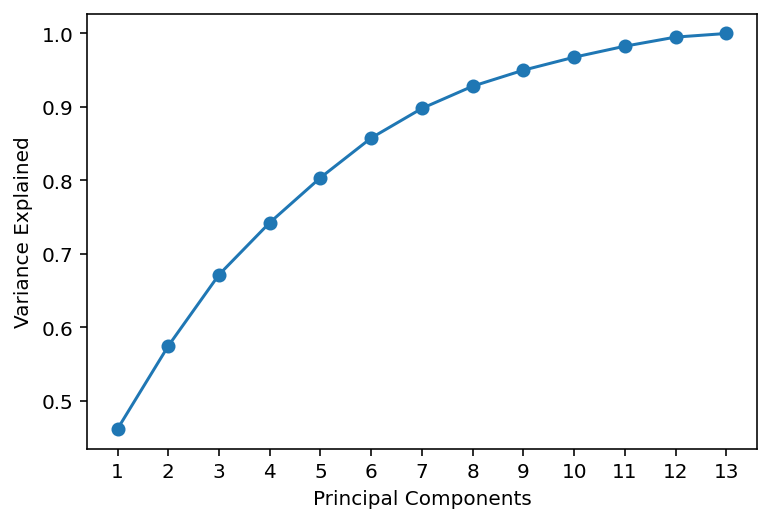

In [32]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train.shape[1]), labels=[i+1 for i in range(X_train.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

## Plot the results

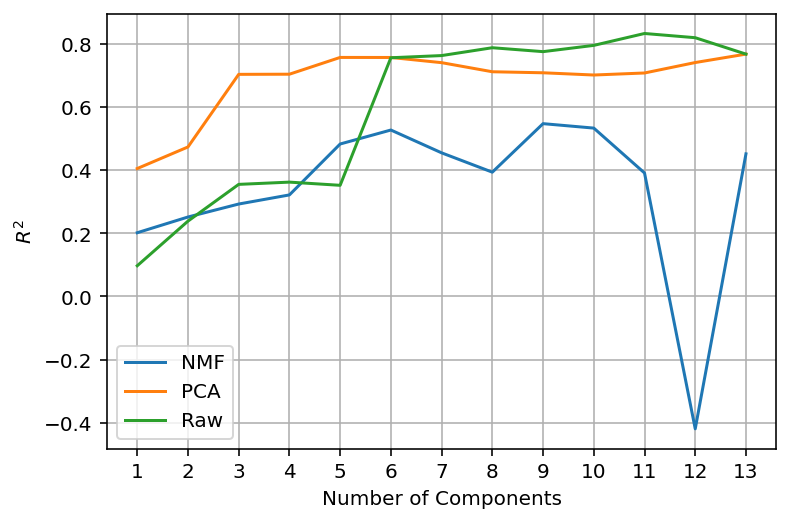

In [25]:
import matplotlib.pyplot as plt
plt.plot(scores_nmf, label ='NMF')
plt.plot(scores_pca, label='PCA')
plt.plot(scores_raw, label='Raw')
plt.legend()
plt.ylabel('$R^2$')
plt.xlabel('Number of Components')
plt.xticks(ticks=[i for i in np.arange(len(scores_pca))], labels=[i+1 for i in np.arange(len(scores_pca))])
plt.grid()
plt.show()

PCA with 6 components seems to be doing good enough.

## Test results

In [35]:
X_train_full_ss = ss.fit_transform(X_train_full)
X_test_ss = ss.fit_transform(X_test)

pca = PCA(n_components=6, random_state=0)

X_train_full2 = pca.fit_transform(X_train_full_ss)
X_test2 = pca.transform(X_test_ss)

score = lr.fit(X_train_full2, y_train_full).score(X_test2, y_test)
score

0.5362849832694463

Ilyas Ustun